Exercise 2d part cnn

In [11]:
# convert png to csv

from PIL import Image
import numpy as np
import glob, os


train_list_dir, train_list_dir_label = [], []
test_list_dir, test_list_dir_label = [], []

train_list, test_list = [], []


def get_dir():
    # get directory of all images
    for i in range(10):
        helper = "/Users/brunnermichael/Documents/GitHub/pattern-recognition-assignment/02_MNIST/data/mnist-png-format-permutated/train/" + str(i)
        os.chdir(helper)
        for file in glob.glob("*.png"):
            train_list_dir.append(file)
            train_list_dir_label.append(i)
    for i in range(10):
        helper = "/Users/brunnermichael/Documents/GitHub/pattern-recognition-assignment/02_MNIST/data/mnist-png-format-permutated/test/" + str(i)
        os.chdir(helper)
        for file in glob.glob("*.png"):
            test_list_dir.append(file)
            test_list_dir_label.append(i)


def get_images():
    # extract all the images
    print("download train images...", end=' ')
    for i in range(len(train_list_dir)):
        helper = "/Users/brunnermichael/Documents/GitHub/pattern-recognition-assignment/02_MNIST/data/mnist-png-format-permutated/train/" + str (train_list_dir_label[i]) + "/" + str(train_list_dir[i])
        train_list.append(loadImage(helper).flatten())
    print(len(train_list), "downloaded")
    print("download test images...", end=' ')
    for i in range(len(test_list_dir)):
        helper = "/Users/brunnermichael/Documents/GitHub/pattern-recognition-assignment/02_MNIST/data/mnist-png-format-permutated/test/" + str (test_list_dir_label[i]) + "/" + str(test_list_dir[i])
        test_list.append(loadImage(helper).flatten())
    print(len(test_list), "downloaded")


#Function to convert image to array or list
def loadImage (inFileName) :
    img = Image.open( inFileName )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data


get_dir()
get_images()



download train images... 60000 downloaded
download test images... 10000 downloaded


In [12]:
%load_ext autoreload
%autoreload 2
from model_task2c import PR_CNN
import torch.nn as nn
import torch
from matplotlib import pyplot as plt


# format training data
train_Y = np.array(train_list_dir_label)
train_X = np.array(train_list)
train_x = train_X.reshape(len(train_X), 1, 28, 28)
train_x = torch.from_numpy(train_x).float()/255
train_y = torch.from_numpy(np.array(train_Y))
train_s = torch.utils.data.TensorDataset(train_x, train_y)

# format test data
test_Y = np.array(test_list_dir_label)
test_X = np.array(test_list)
test_x = test_X.reshape(len(test_X), 1, 28, 28)
test_x = torch.from_numpy(test_x).float()/255
test_y = torch.from_numpy(np.array(test_Y))
test_s = torch.utils.data.TensorDataset(test_x, test_y)

print("size training set:", len(train_x), "size testing set:", len(test_x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
size training set: 60000 size testing set: 10000


Parameters: learing rate = 0.02,  number of epochs = 30, batch size = 50
Epoch 1/30, Loss: 0.1994, Accuracy: 0.9127
Epoch 2/30, Loss: 0.5064, Accuracy: 0.9303
Epoch 3/30, Loss: 0.4363, Accuracy: 0.9423
Epoch 4/30, Loss: 0.0717, Accuracy: 0.9467
Epoch 5/30, Loss: 0.1426, Accuracy: 0.9524
Epoch 6/30, Loss: 0.1378, Accuracy: 0.9563
Epoch 7/30, Loss: 0.3725, Accuracy: 0.9533
Epoch 8/30, Loss: 0.0792, Accuracy: 0.9490
Epoch 9/30, Loss: 0.0628, Accuracy: 0.9578
Epoch 10/30, Loss: 0.0360, Accuracy: 0.9597
Epoch 11/30, Loss: 0.0389, Accuracy: 0.9588
Epoch 12/30, Loss: 0.0606, Accuracy: 0.9582
Epoch 13/30, Loss: 0.0316, Accuracy: 0.9585
Epoch 14/30, Loss: 0.0617, Accuracy: 0.9574
Epoch 15/30, Loss: 0.1025, Accuracy: 0.9612
Epoch 16/30, Loss: 0.0406, Accuracy: 0.9610
Epoch 17/30, Loss: 0.0688, Accuracy: 0.9630
Epoch 18/30, Loss: 0.0332, Accuracy: 0.9579
Epoch 19/30, Loss: 0.0453, Accuracy: 0.9603
Epoch 20/30, Loss: 0.0845, Accuracy: 0.9592
Epoch 21/30, Loss: 0.0065, Accuracy: 0.9610
Epoch 22/30,

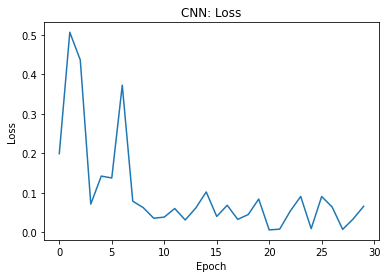

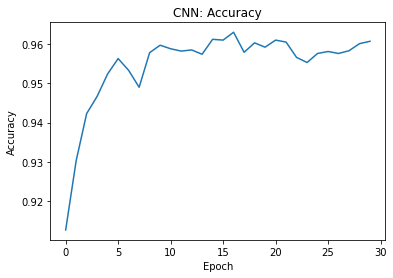

In [13]:
# global variables for training
batch_size = 50
accuracy_set = []

# build train_loader with according batch_size
train_loader = torch.utils.data.DataLoader(train_s, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_s, batch_size=batch_size, shuffle=True)

def train(l_rate, num_epochs):
    cnn = PR_CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(cnn.parameters(), lr=l_rate)
    print(f'Parameters: learing rate = {l_rate},  number of epochs = {num_epochs}, batch size = {batch_size}')

    acc_list, loss_list = [], []
    iter_list, counter = [], 0
    # iterate training set
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            counter += 1
            outputs = cnn(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # test accuracy with test set
        correct, total = 0, 0
        for i, (images_test, labels_test) in enumerate(test_loader):
            outputs_t = cnn(images_test)
            predicted = torch.max(outputs_t.data, 1)[1]
            total += len(labels_test)
            correct += (predicted == labels_test).sum()
        acc_list.append(correct / total)
        loss_list.append(loss.data)
        print (f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.sum():.4f}, Accuracy: {correct / total:.4f}')
    accuracy_set.append(acc_list[-1])
    print(f'Accuracy: {100 * correct / total:.3f}%')
    return acc_list, loss_list


acc_list, loss_list = train(l_rate=.02, num_epochs=30)

# plot accuracy and loss
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN: Loss")
plt.show()

plt.plot(acc_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy")
plt.show()

Results:

Accuracy: 96.07%

Comparison to normal set (non permutated):

The accuracy of the permutated set converges as well after approximately after 7 rounds. But the accuracy is around 2% lower than the non permutated set.

